# Hotel Rating Classification

### Business Objective:
	This is a sample dataset which consists of 20,000reviews and ratings for different hotels and our goal is to examine how travelers are communicating their positive and negative experiences in online platforms for staying in a specific hotel and major objective is what are the attributes that travelers are considering while selecting a hotel. With this manager can understand which elements of their hotel influence more in forming a positive review or improves hotel brand image.


#### Import libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

#### Reading Dataset 

In [4]:
hotel = pd.read_excel("hotel_reviews.xlsx")
hotel

,Review,Rating,@
0,nice hotel expensive parking got good deal sta...,4,NaN
1,ok nothing special charge diamond member hilto...,2,NaN
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,NaN
4,"great stay great stay, went seahawk game aweso...",5,NaN
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,NaN
20487,great location price view hotel great quick pl...,4,NaN
20488,"ok just looks nice modern outside, desk staff ...",2,NaN
20489,hotel theft ruined vacation hotel opened sept ...,1,NaN


### Exploratory Data Analysis

In [5]:
hotel.shape

(20491, 3)

#### Removing unwanted column '@'

In [6]:
hotel= hotel.drop(['@'],axis=1)
hotel

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


#### Datatypes 

In [7]:
hotel.dtypes

Review    object
Rating     int64
dtype: object

In [8]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


#### finding duplicates

In [9]:
hotel[hotel.duplicated()].shape

(0, 2)

In [10]:
hotel.isnull().sum()

Review    0
Rating    0
dtype: int64

### Statistical summary

In [11]:
hotel.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [12]:
hotel['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

### Visualization of Data

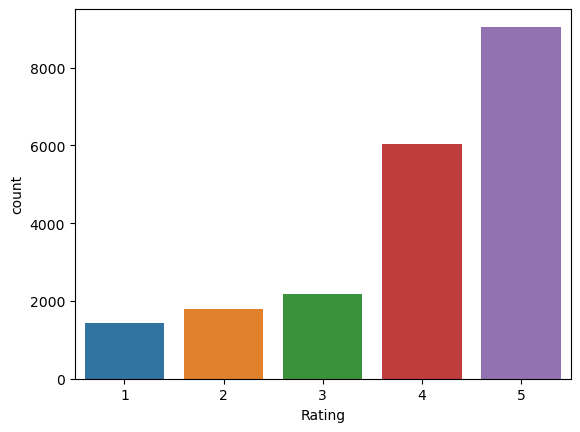

In [13]:
sns.countplot(x='Rating', data= hotel)
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

In [14]:
hotel['Sentiment']=np.where(hotel['Rating']>=4,"Positive",'Negative')
hotel

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,Negative
3,"unique, great stay, wonderful time hotel monac...",5,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive
20487,great location price view hotel great quick pl...,4,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative


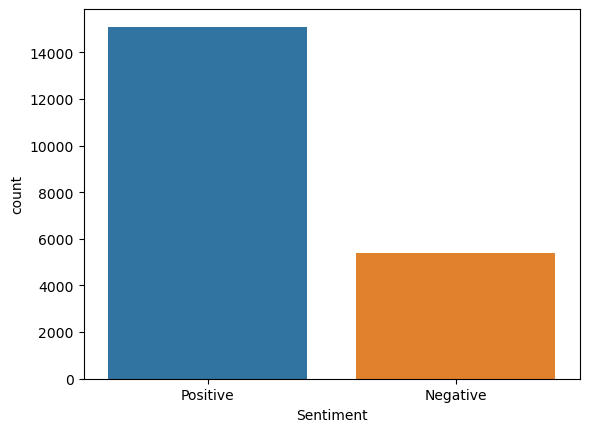

In [15]:
sns.countplot(x='Sentiment',data= hotel)
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.show()

In [16]:
hotel["Sentiment"].value_counts()

Positive    15093
Negative     5398
Name: Sentiment, dtype: int64

In [17]:
#Word frequency
freq = pd.Series(' '.join(hotel['Review']).split()).value_counts()[:20] # for top 20
freq

hotel        42079
not          30750
room         30532
great        18732
n't          18436
staff        14950
good         14791
did          13433
just         12458
stay         11376
no           11360
rooms        10935
nice         10918
stayed       10022
location      9515
service       8549
breakfast     8407
beach         8218
food          8026
like          7677
dtype: int64

In [ ]:
# Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

### Data Preprocessing

In [18]:
import re #regular expression
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [19]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

def preprocess(text):
    
    '''Make text lowercase, remove text in square brackets, remove punctuation & remove words containing numbers,remove urls.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '',text)
    text = re.sub("[^A-Za-z" "]+"," ", text)
    
    '''Tokenization'''
    tokens = word_tokenize(text)
    
    '''Removing Stop words'''
    
    tokens = [token for token in tokens if token not in stop_words]
    
    #'''Stemming'''
    #ps = PorterStemmer()
    #tokens = [ps.stem(word) for word in tokens]
    
    '''Lemmatization'''
    
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove extra whitespaces and join tokens back to form cleaned text
    clean_Review = ' '.join(lemmatized_tokens).strip()
    
    return clean_Review

hotel['cleaned_Review'] = hotel['Review'].apply(preprocess)
hotel

,Review,Rating,Sentiment,cleaned_Review
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,best kept secret time staying charm ca nt beat...
20487,great location price view hotel great quick pl...,4,Positive,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,ok look nice modern outside desk staff nt part...
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,hotel theft ruined vacation hotel opened sept ...


In [20]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(hotel['cleaned_Review']).split()).value_counts()[:20] # for top 20
freq_Sw

hotel         52918
room          46345
great         21093
nt            18993
good          17042
staff         16269
stay          15336
night         13753
day           12740
time          12599
nice          12403
location      11225
service       10523
stayed        10466
restaurant    10089
beach         10036
breakfast      9652
place          9377
clean          9370
food           9248
dtype: int64

### Sentiment Analysis

In [ ]:
# ! pip install vaderSentiment

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to perform sentiment analysis on your hotel reviews:

def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    
    # Determine sentiment label based on the compound score
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
sentiment = lambda y: analyze_sentiment(y)

In [22]:
hotel.cleaned_Review.apply(sentiment)

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
20486    Positive
20487    Positive
20488    Positive
20489    Positive
20490    Positive
Name: cleaned_Review, Length: 20491, dtype: object

In [23]:
hotel['sentiment_value'] = hotel['cleaned_Review'].apply(sentiment)
hotel

,Review,Rating,Sentiment,cleaned_Review,sentiment_value
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,nice room experience hotel monaco seattle good...,Positive
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,Positive
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,best kept secret time staying charm ca nt beat...,Positive
20487,great location price view hotel great quick pl...,4,Positive,great location price view hotel great quick pl...,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,ok look nice modern outside desk staff nt part...,Positive
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,hotel theft ruined vacation hotel opened sept ...,Positive


In [24]:
# how many words are in the sentence?
hotel['word_count'] = hotel['cleaned_Review'].str.split().apply(len)
hotel['word_count'].head(10)
hotel

,Review,Rating,Sentiment,cleaned_Review,sentiment_value,word_count
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,Positive,80
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,Positive,228
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,nice room experience hotel monaco seattle good...,Positive,195
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,Positive,85
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,Positive,178
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,best kept secret time staying charm ca nt beat...,Positive,104
20487,great location price view hotel great quick pl...,4,Positive,great location price view hotel great quick pl...,Positive,39
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,ok look nice modern outside desk staff nt part...,Positive,61
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,hotel theft ruined vacation hotel opened sept ...,Positive,738


In [25]:
# Sentiment score of the whole review
hotel['sentiment_value'].describe()

count        20491
unique           3
top       Positive
freq         19382
Name: sentiment_value, dtype: object

In [26]:
hotel['sentiment_value'].value_counts()

Positive    19382
Negative     1043
Neutral        66
Name: sentiment_value, dtype: int64

In [ ]:
sns.histplot(hotel['sentiment_value'])

In [1]:
reviews_pos=' '.join(hotel['cleaned_Review'])

NameError: name 'hotel' is not defined

In [2]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(10,20))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)

NameError: name 'reviews_pos' is not defined

### Feature Extraction

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(hotel['cleaned_Review'])

In [30]:
print(vectorizer.vocabulary_)

{'nice': 40900, 'hotel': 29730, 'expensive': 22026, 'parking': 44574, 'got': 26730, 'good': 26517, 'deal': 16091, 'stay': 58470, 'anniversary': 2552, 'arrived': 3670, 'late': 34496, 'evening': 21279, 'took': 62894, 'advice': 924, 'previous': 47565, 'review': 51671, 'valet': 66142, 'check': 11263, 'quick': 48825, 'easy': 19448, 'little': 35457, 'disappointed': 17634, 'nonexistent': 41515, 'view': 66649, 'room': 52334, 'clean': 12171, 'size': 55978, 'bed': 6285, 'comfortable': 13047, 'woke': 69004, 'stiff': 58747, 'neck': 40522, 'high': 28936, 'pillow': 45837, 'soundproof': 57162, 'like': 35192, 'heard': 28389, 'music': 40088, 'night': 41064, 'morning': 39556, 'loud': 36076, 'bang': 5223, 'door': 18466, 'opening': 43000, 'closing': 12470, 'hear': 28386, 'people': 45177, 'talking': 60610, 'hallway': 27833, 'maybe': 37654, 'noisy': 41409, 'neighbor': 40675, 'aveda': 4472, 'bath': 5714, 'product': 48005, 'goldfish': 26474, 'touch': 63100, 'taken': 60573, 'advantage': 873, 'staying': 58525, 

In [31]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

C:\Users\afrin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abetter', 'abian', 'abide', 'abiding', 'abigail', 'ability', 'abis', 'abit', 'ablast', 'able', 'ableall', 'ablebodied', 'abledbut', 'ableto', 'abnormal', 'abnormalrooms', 'aboard', 'abode', 'aboit', 'abolished', 'abolutely', 'abominable', 'abondon', 'abono', 'aboot', 'aboout', 'aboput', 'aboriginal', 'aborted', 'aboslutely', 'abosolutely', 'abosolutey', 'abosultely', 'abot', 'abottle', 'abou', 'abound', 'abounded', 'abounds', 'abouot', 'abour', 'abouta', 'aboutactivities', 'aboutby', 'aboutfacilities', 'aboutfood', 'aboutfor', 'aboutfrom', 'aboutgrounds', 'abouti']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Bigrams and Trigrams can be included here

In [32]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [33]:
top2_words = get_top_n2_words(hotel['cleaned_Review'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,great location,2143
1,staff friendly,2089
2,ca nt,1809
3,room clean,1715
4,punta cana,1684


[Text(0, 0, 'great location'),
 Text(1, 0, 'staff friendly'),
 Text(2, 0, 'ca nt'),
 Text(3, 0, 'room clean'),
 Text(4, 0, 'punta cana'),
 Text(5, 0, 'minute walk'),
 Text(6, 0, 'hotel great'),
 Text(7, 0, 'great hotel'),
 Text(8, 0, 'walking distance'),
 Text(9, 0, 'recommend hotel'),
 Text(10, 0, 'friendly helpful'),
 Text(11, 0, 'stayed hotel'),
 Text(12, 0, 'hotel room'),
 Text(13, 0, 'stayed night'),
 Text(14, 0, 'room service'),
 Text(15, 0, 'hotel staff'),
 Text(16, 0, 'hotel stayed'),
 Text(17, 0, 'stay hotel'),
 Text(18, 0, 'place stay'),
 Text(19, 0, 'room small')]

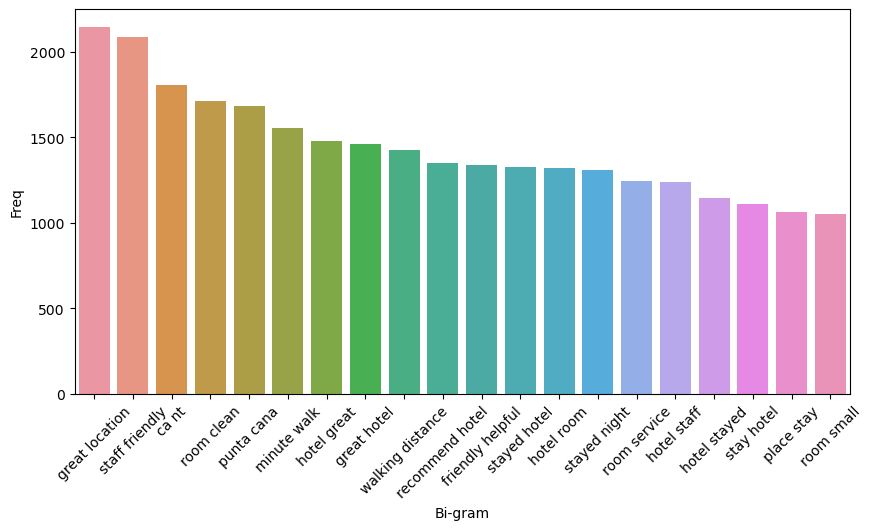

In [34]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [35]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [36]:
top3_words = get_top_n3_words(hotel['cleaned_Review'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,staff friendly helpful,702
1,hotel great location,545
2,old san juan,354
3,highly recommend hotel,314
4,great place stay,273
...,...,...
195,staff courteous helpful,46
196,air conditioning worked,46
197,hotel fantastic location,46
198,room clean bathroom,46


[Text(0, 0, 'staff friendly helpful'),
 Text(1, 0, 'hotel great location'),
 Text(2, 0, 'old san juan'),
 Text(3, 0, 'highly recommend hotel'),
 Text(4, 0, 'great place stay'),
 Text(5, 0, 'flat screen tv'),
 Text(6, 0, 'stayed hotel night'),
 Text(7, 0, 'king size bed'),
 Text(8, 0, 'ca nt wait'),
 Text(9, 0, 'great hotel great'),
 Text(10, 0, 'good value money'),
 Text(11, 0, 'hotel staff friendly'),
 Text(12, 0, 'la carte restaurant'),
 Text(13, 0, 'easy walking distance'),
 Text(14, 0, 'free internet access'),
 Text(15, 0, 'ca nt beat'),
 Text(16, 0, 'hotel good location'),
 Text(17, 0, 'staff helpful friendly'),
 Text(18, 0, 'ca nt say'),
 Text(19, 0, 'room good size')]

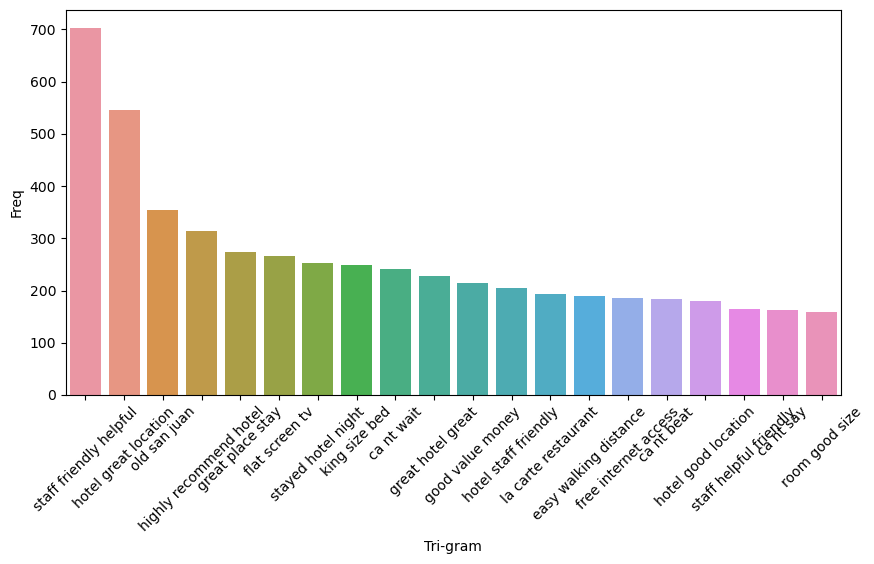

In [37]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [39]:
X = hotel['cleaned_Review']

Y = hotel['Sentiment']

label_mapping = { 'Negative':0, 'Positive': 1}

y = Y.map(label_mapping)

### TF- IDF - Term frequency inverse Document Frequency

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features= 2000, max_df = 0.5, smooth_idf=True)
X = vectorizer_tfidf.fit_transform(X)
#print(vectorizer_tfidf.get_feature_names())
#print(tf_idf.toarray())

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16392, 2000), (16392,), (4099, 2000), (4099,))

### Model Building

### Naive Bayes

In [43]:
naive_clf = MultinomialNB()

naive_clf.fit(X_train, y_train)

naive_pred = naive_clf.predict(X_test)

confusion_matrix(naive_pred, y_test)

array([[ 572,   75],
       [ 485, 2967]], dtype=int64)

In [44]:
rev = ["bad food in this hotel"]
rev_vec = vectorizer_tfidf.transform(rev)
naive_clf.predict(rev_vec)

array([1], dtype=int64)

In [45]:
# Evaluate the Naive bayes model
naive_accuracy = accuracy_score(y_test, naive_pred)
classification_rep_naive = classification_report(y_test, naive_pred)

print("Naive Bayes Accuracy:", naive_accuracy)
print("Classification Report:\n", classification_rep_naive)

Naive Bayes Accuracy: 0.8633813125152476
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.54      0.67      1057
           1       0.86      0.98      0.91      3042

    accuracy                           0.86      4099
   macro avg       0.87      0.76      0.79      4099
weighted avg       0.87      0.86      0.85      4099



### Support Vector Machine

In [60]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_clf = SVC(kernel='linear')

# Train the SVM classifier on the sentiment data
svm_clf.fit(X_train, y_train)

# Make predictions
svm_pred = svm_clf.predict(X_test)


confusion_matrix(svm_pred, y_test)

array([[ 771,  151],
       [ 286, 2891]], dtype=int64)

In [61]:
rev = ["good food in this hotel"]
rev_vec = vectorizer_tfidf.transform(rev)
svm_clf.predict(rev_vec)

array([1], dtype=int64)

In [62]:
# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_pred)
classification_rep_svm = classification_report(y_test, svm_pred)

print("SVM Accuracy:", svm_accuracy)
print("Classification Report:\n", classification_rep_svm)

SVM Accuracy: 0.8933886313735058
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      1057
           1       0.91      0.95      0.93      3042

    accuracy                           0.89      4099
   macro avg       0.87      0.84      0.85      4099
weighted avg       0.89      0.89      0.89      4099



### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
lr_clf = LogisticRegression()

# Train the Logistic Regression classifier on the sentiment data
lr_clf.fit(X_train, y_train)

# Make predictions
lr_pred = lr_clf.predict(X_test)


confusion_matrix(lr_pred, y_test)

array([[ 753,  121],
       [ 304, 2921]], dtype=int64)

In [50]:
rev = ["medium food in this hotel"]
rev_vec = vectorizer_tfidf.transform(rev)
lr_clf.predict(rev_vec)

array([1], dtype=int64)

In [51]:
# Evaluate the Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_pred)
classification_rep_lr = classification_report(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Classification Report:\n", classification_rep_lr)

Logistic Regression Accuracy: 0.8963161746767504
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      1057
           1       0.91      0.96      0.93      3042

    accuracy                           0.90      4099
   macro avg       0.88      0.84      0.86      4099
weighted avg       0.89      0.90      0.89      4099



### XGBoost

In [52]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_clf.predict(X_test)

confusion_matrix(xgb_pred, y_test)

array([[ 702,  138],
       [ 355, 2904]], dtype=int64)

In [53]:
rev = ["bad food in this hotel"]
rev_vec = vectorizer_tfidf.transform(rev)
xgb_clf.predict(rev_vec)

array([0])

In [54]:
# Evaluate the XGBoost model
XGB_accuracy = accuracy_score(y_test, xgb_pred)
classification_rep_XGB = classification_report(y_test, xgb_pred)

print("XGBoost Accuracy:",XGB_accuracy)
print("Classification Report XGB:\n", classification_rep_XGB)

XGBoost Accuracy: 0.8797267626250305
Classification Report XGB:
               precision    recall  f1-score   support

           0       0.84      0.66      0.74      1057
           1       0.89      0.95      0.92      3042

    accuracy                           0.88      4099
   macro avg       0.86      0.81      0.83      4099
weighted avg       0.88      0.88      0.87      4099



### KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Make predictions
knn_pred = knn_clf.predict(X_test)

confusion_matrix(knn_pred, y_test)

C:\Users\afrin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[ 437,  154],
       [ 620, 2888]], dtype=int64)

In [56]:
# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, knn_pred)
classification_rep_knn = classification_report(y_test, knn_pred)

print("KNN Accuracy:", knn_accuracy)
print("Classification Report KNN:\n", classification_rep_knn)

KNN Accuracy: 0.8111734569407173
Classification Report KNN:
               precision    recall  f1-score   support

           0       0.74      0.41      0.53      1057
           1       0.82      0.95      0.88      3042

    accuracy                           0.81      4099
   macro avg       0.78      0.68      0.71      4099
weighted avg       0.80      0.81      0.79      4099



### Model Evalution

In [63]:
results=[]
def evaluate_model(model, y_true, y_pred, model_name):
    Accuracy = accuracy_score(y_test, y_pred)
    Precision = precision_score(y_pred, y_test, average="weighted")
    Recall = recall_score(y_pred, y_test, average="weighted")
    results.append({
        "Model Name": model_name,
        "Accuracy": Accuracy,
        "Precision": Precision,
        "Recall": Recall}
        )

In [64]:
evaluate_model(naive_clf, y_test, naive_pred, "Naive Bayes")
evaluate_model(svm_clf, y_test, svm_pred, "Support Vector Machine")
evaluate_model(lr_clf, y_test, lr_pred, "Logistic Regression")
evaluate_model(xgb_clf, y_test, xgb_pred, "XGBoost")
evaluate_model(knn_clf, y_test, knn_pred, "KNN")

In [65]:
from tabulate import tabulate
# Print the results in a table format
table = tabulate(results, headers="keys", tablefmt="fancy_grid")
print(table)

╒════════════════════════╤════════════╤═════════════╤══════════╕
│ Model Name             │   Accuracy │   Precision │   Recall │
╞════════════════════════╪════════════╪═════════════╪══════════╡
│ Naive Bayes            │   0.863381 │    0.906811 │ 0.863381 │
├────────────────────────┼────────────┼─────────────┼──────────┤
│ Support Vector Machine │   0.893389 │    0.900665 │ 0.893389 │
├────────────────────────┼────────────┼─────────────┼──────────┤
│ Logistic Regression    │   0.896316 │    0.907381 │ 0.896316 │
├────────────────────────┼────────────┼─────────────┼──────────┤
│ XGBoost                │   0.879727 │    0.895105 │ 0.879727 │
├────────────────────────┼────────────┼─────────────┼──────────┤
│ KNN                    │   0.811173 │    0.872103 │ 0.811173 │
╘════════════════════════╧════════════╧═════════════╧══════════╛


In [66]:
import pickle

In [67]:
file = "svm_deploy.sav"
pickle.dump(svm_clf, open(file,"wb"))

In [68]:
loaded_model=pickle.load(open("svm_deploy.sav","rb"))